In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from functools import reduce
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('march.csv')
df

,obs,traj,MPA,distance,land,lat,lon,temp,time,z
0,0,0,1.0,0.00000,0.000000,43.288517,5.171321,13.421764,2017-03-01 00:00:00,1.018237
1,0,1,1.0,0.00000,0.000000,43.296562,4.982898,12.984367,2017-03-05 00:00:00,1.018237
2,0,2,1.0,0.00000,0.000000,43.294650,4.962841,13.468207,2017-03-10 00:00:00,1.018237
3,0,3,1.0,0.00000,0.000000,43.280422,5.100956,13.317587,2017-03-14 00:00:00,1.018237
4,0,4,1.0,0.00000,0.000000,43.294853,5.134313,13.718286,2017-03-19 00:00:00,1.018237
...,...,...,...,...,...,...,...,...,...,...
779491,743,9180,0.0,760.41320,0.000000,36.750824,1.234207,15.911005,2017-03-31 23:00:00,1.018237
779492,743,9741,10.0,805.02730,0.936216,35.916252,0.077910,1.040119,2017-03-31 23:00:00,1.018237
779493,743,9811,10.0,424.15085,0.677286,35.075947,-2.248944,5.438546,2017-03-31 23:00:00,1.018237
779494,743,9881,10.0,414.81730,0.999941,35.221684,-1.583336,0.000952,2017-03-31 23:00:00,1.018237


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['traj','MPA','distance','lat','lon']])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()


,0,1,2,3,4
count,7.794960e+05,7.794960e+05,7.794960e+05,7.794960e+05,7.794960e+05
mean,-3.210710e-16,1.541895e-14,1.249169e-14,-7.053016e-15,7.791963e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.724844e+00,-9.652999e-01,-8.241013e-01,-1.897589e+00,-2.212602e+00
25%,-8.692505e-01,-9.652999e-01,-6.921397e-01,-1.009795e+00,-9.685363e-01
50%,-3.281682e-03,-3.120678e-01,-4.558992e-01,8.488441e-02,5.411031e-01
75%,8.689122e-01,1.212140e+00,3.332844e-01,1.073613e+00,8.002284e-01
max,1.721394e+00,1.212140e+00,4.868170e+00,1.713679e+00,1.695230e+00


In [19]:
#defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)


KMeans(n_clusters=3)

In [20]:
# inertia on the fitted data
kmeans.inertia_

1662167.0833207434

/home/tom/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/tom/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/tom/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/tom/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/tom/anaconda3/lib/python3.8/site-packages/sklearn/cluster/

Text(0, 0.5, 'Inertia')

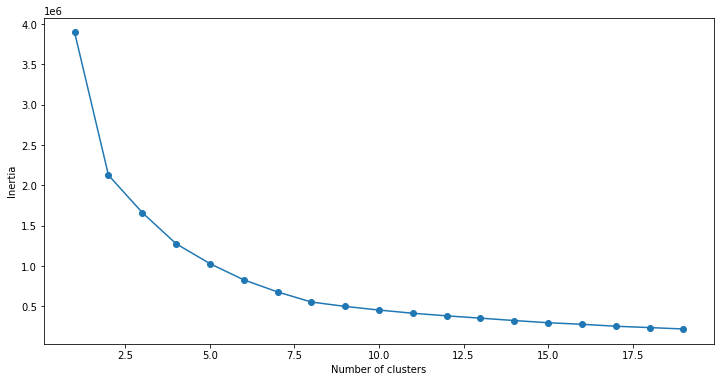

In [21]:
#sum of squared errors (SSE)
#The Elbow Method
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [24]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

/home/tom/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


1    213913
4    159124
0    145910
3    132791
2    127758
Name: cluster, dtype: int64

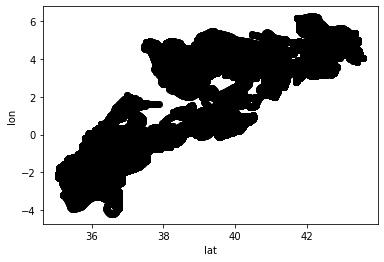

In [4]:
X = df[["lat","lon"]]
plt.scatter(X["lat"],X["lon"],c='black')
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

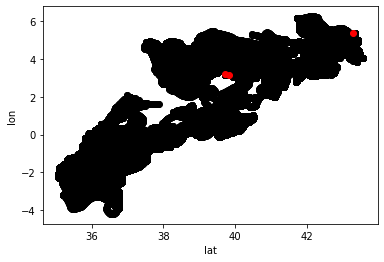

In [5]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["lat"],X["lon"],c='black')
plt.scatter(Centroids["lat"],Centroids["lon"],c='red')
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

In [7]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["lat"]-row_d["lat"])**2
            d2=(row_c["lon"]-row_d["lon"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["lon","lat"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['lon'] - Centroids['lon']).sum() + (Centroids_new['lat'] - Centroids['lat']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["lon","lat"]]

<ipython-input-7-a426eed4c32c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-a426eed4c32c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.56922184648535
-0.21104014544829286
-0.08781971552739098
-0.02793334088273558
-0.009779410044334469
-0.00352529531355672
-0.001264531369288724
-0.00042217282953682655
-0.0002080996755919884
-7.854038203669589e-05
0.0


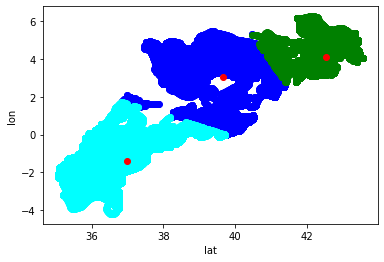

In [8]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["lat"],data["lon"],c=color[k])
plt.scatter(Centroids["lat"],Centroids["lon"],c='red')
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()